In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load your dataset
df=pd.read_csv('/Users/parmikenia/Desktop/internship codes/combined_credit2.csv')

X = df.drop(columns=['Customer_ID','Credit_Score'])
y = df['Credit_Score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature selection using ANOVA F-test
# SelectKBest will select the top k features (based on F-test score)
k = 10  # You can change 'k' to select more or fewer features
anova_selector = SelectKBest(score_func=f_regression, k=k)

# Create a pipeline that standardizes the data, selects the best features, and applies the RBF SVR model
svr_rbf_pipeline = make_pipeline(
    StandardScaler(),  # Standardizes the data
    anova_selector,    # Selects the best features
    SVR(kernel='rbf')  # RBF SVR model
)

# Train the model
svr_rbf_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_rbf_pipeline.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# If you want to see which features were selected, you can print their indices
selected_features = anova_selector.get_support(indices=True)
print(f'Selected feature indices: {selected_features}')

ANOVA NEW |^

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns
from sklearn.svm import SVR
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [3]:
df=pd.read_csv('/Users/parmikenia/Desktop/internship codes/combined_credit2.csv')

In [4]:
X = df.drop(columns=['Customer_ID','Credit_Score'])
y = df['Credit_Score']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train

,Age,Income,Loan_Amount,Loan_Term_Months,Rent_Payments,Utility_Payments_On_Time,Mobile_Phone_Payment_On_Time,Social_Media_Activity_Score,Transaction_Behavior_Score,gender_female,...,gender_non-binary,demographics_Rural,demographics_Sub_Urban,demographics_Urban,profession_Marketer Manager,profession_Software Engineer,profession_Student,social mediaplatform_Facebook,social mediaplatform_Instagram,social mediaplatform_YouTube
29,67,0.672378,0.131375,0.25,0.180040,True,True,0.173469,0.948980,False,...,True,False,True,False,False,True,False,False,False,True
535,65,0.134106,0.017020,0.25,0.993982,True,False,0.132653,0.367347,True,...,False,False,True,False,False,False,True,True,False,False
695,28,0.504811,0.936890,1.00,0.670010,True,True,0.479592,0.673469,True,...,False,False,False,True,False,True,False,False,True,False
557,50,0.410054,0.132848,0.00,0.942828,True,True,0.071429,0.632653,False,...,True,True,False,False,False,False,True,False,True,False
836,35,0.205239,0.994027,0.50,0.545637,True,False,0.285714,0.408163,False,...,True,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,61,0.439328,0.512509,0.25,0.634905,False,True,0.265306,0.418367,False,...,False,False,True,False,False,True,False,False,True,False
270,21,0.288757,0.330074,0.00,0.625878,True,True,0.234694,0.734694,False,...,True,False,False,True,False,False,True,True,False,False
860,22,0.780521,0.638954,0.50,0.678536,True,True,0.673469,0.469388,True,...,False,False,True,False,False,True,False,True,False,False
435,49,0.709565,0.339955,0.25,0.066199,True,True,0.928571,0.295918,False,...,True,False,True,False,True,False,False,False,False,True


In [7]:
print(X_train.shape)
print(y_train.shape)

(800, 21)
(800,)


In [8]:
import numpy as np

print(np.any(np.isnan(X_train)))
print(np.any(np.isinf(X_train)))
print(np.any(np.isnan(y_train)))
print(np.any(np.isinf(y_train)))

False
False
False
False


ANOVA OLD

In [ ]:
column_names=X.columns.to_list()

In [ ]:
X_train_df=pd.DataFrame(X_train,columns=column_names)

In [ ]:
sel = SelectKBest(f_classif, k=10).fit(X_train, y_train)

# display selected feature names
selected_features=X_train_df.columns[sel.get_support()]
selected_features

In [ ]:
df_anova = df[selected_features]

In [ ]:
X_train_anova, X_test_anova, y_train_anova, y_test_anova = train_test_split(df_anova, y, test_size=0.2, random_state=0)

# Train the RBF SVR model (without scaling)
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train_anova, y_train_anova)

# Make predictions on the test set
y_pred = svr_rbf.predict(X_test_anova)

In [ ]:
mse = mean_squared_error(y_test_anova, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
rmse = mean_squared_error(y_test_anova, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

In [ ]:
mae = mean_absolute_error(y_test_anova, y_pred)
print(f"Mean Absolute Error: {mae}")

 LASSO REGRESSION (L1 REGULARIZATION)

In [ ]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

In [ ]:
column_names = X.columns.to_list()

In [ ]:
# calling the model with the best parameter
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns.
plt.bar(column_names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 1)
plt.show()

In [ ]:
df_lasso=df[['Income','Loan_Term_Months','Mobile_Phone_Payment_On_Time','Transaction_Behavior_Score']]

In [ ]:
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(df_lasso, y, test_size=0.2, random_state=0)

# Train the RBF SVR model (without scaling)
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train_lasso, y_train_lasso)

# Make predictions on the test set
y_pred = svr_rbf.predict(X_test_lasso)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test_lasso, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
rmse = mean_squared_error(y_test_lasso, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

In [ ]:
mae = mean_absolute_error(y_test_lasso, y_pred)
print(f"Mean Absolute Error: {mae}")

RANDOM FOREST

In [ ]:
rf = RandomForestRegressor(random_state=0)

rf.fit(X_train,y_train)

In [ ]:
column_names = X.columns.to_list()

In [ ]:
f_i = list(zip(column_names,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [ ]:
df_rf=df[['Income','Loan_Amount','Rent_Payments','Transaction_Behavior_Score','Social_Media_Activity_Score','Age','Loan_Term_Months']]

In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(df_rf, y, test_size=0.2, random_state=0)

# Train the RBF SVR model (without scaling)
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train_rf, y_train_rf)

# Make predictions on the test set
y_pred = svr_rbf.predict(X_test_rf)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test_rf, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
rmse = mean_squared_error(y_test_rf, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

In [ ]:
mae = mean_absolute_error(y_test_rf, y_pred)
print(f"Mean Absolute Error: {mae}")

Forward and Backward

Forward

In [ ]:
# Initialize the Ridge model
ridge = Ridge()

In [ ]:
# Perform Sequential Feature Selection
sfs_forward = SequentialFeatureSelector(
   ridge, n_features_to_select=3, direction="forward"
).fit(X, y)

In [ ]:
column_names = X.columns.to_list()

In [ ]:
arr = np.array(column_names)

In [ ]:
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=3, direction="forward"
).fit(X, y)

print(
    "Features selected by forward sequential selection: "
    f"{arr[sfs_forward.get_support()]}"
)

In [ ]:
df_sfs_forward=df[['Loan_Term_Months','social mediaplatform_Facebook','social mediaplatform_Instagram']]

In [ ]:
X_train_sfs_forward, X_test_sfs_forward, y_train_sfs_forward, y_test_sfs_forward = train_test_split(df_sfs_forward, y, test_size=0.2, random_state=0)

# Train the RBF SVR model (without scaling)
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train_sfs_forward, y_train_sfs_forward)

# Make predictions on the test set
y_pred = svr_rbf.predict(X_test_sfs_forward)

In [ ]:
mse = mean_squared_error(y_test_sfs_forward, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
rmse = mean_squared_error(y_test_sfs_forward, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

In [ ]:
mae = mean_absolute_error(y_test_sfs_forward, y_pred)
print(f"Mean Absolute Error: {mae}")

Recursive Feature Eimination with Cross-Validation

In [ ]:
# Step 1: Initialize a Ridge model for feature selection with RFE
ridge = Ridge()

# Step 2: Apply Recursive Feature Elimination (RFE) with the Ridge model
n_features_to_select = 5  # Select top 5 features
rfe = RFE(estimator=ridge, n_features_to_select=n_features_to_select)
rfe.fit(X, y)

In [ ]:
# Step 3: Extract the selected features
selected_features_rfe = X.columns[rfe.support_]
print(f'Selected features by RFE: {selected_features_rfe}')

In [ ]:
#Step 4: Prepare the DataFrame with the selected features
df_rfe = X[selected_features_rfe]

In [ ]:
# Step 5: Split the selected features into training and testing sets
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(df_rfe, y, test_size=0.2, random_state=42)

# Step 6: Initialize the RBF SVR model
svr_rbf = SVR(kernel='rbf')

# Step 7: Train the RBF SVR model on the selected features
svr_rbf.fit(X_train_rfe, y_train_rfe)

# Step 8: Predict on the test set
y_pred = svr_rbf.predict(X_test_rfe)

In [ ]:
# Step 9: Calculate evaluation metrics
mse = mean_squared_error(y_test_rfe, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rfe, y_pred)

# Output the results
print(f"Selected features: {selected_features_rfe}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mutual Information

In [9]:
# Calculate mutual information for each feature
mi = mutual_info_regression(X, y)

In [10]:
# Create a DataFrame to display mutual information values for each feature
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})

In [11]:
# Sort by mutual information score
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

In [12]:
# Print the mutual information scores
print(mi_df)

                           Feature  Mutual Information
0                              Age            0.066570
3                 Loan_Term_Months            0.043556
4                    Rent_Payments            0.039750
8       Transaction_Behavior_Score            0.027902
16    profession_Software Engineer            0.018533
10                     gender_male            0.008821
14              demographics_Urban            0.006034
5         Utility_Payments_On_Time            0.003606
15     profession_Marketer Manager            0.000242
6     Mobile_Phone_Payment_On_Time            0.000000
7      Social_Media_Activity_Score            0.000000
9                    gender_female            0.000000
1                           Income            0.000000
11               gender_non-binary            0.000000
12              demographics_Rural            0.000000
13          demographics_Sub_Urban            0.000000
2                      Loan_Amount            0.000000
17        

In [13]:
# You can now select the most informative features based on the MI score
# For example, selecting the top 5 features based on MI
selected_features = mi_df['Feature'].head(5).values

In [14]:
# Split the data into training and testing sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.3, random_state=42)

# Step 6: Initialize the RBF SVR model
svr_rbf = SVR(kernel='rbf')

# Step 7: Train the RBF SVR model on the selected features
svr_rbf.fit(X_train, y_train)

# Step 8: Predict on the test set
y_pred = svr_rbf.predict(X_test)


In [15]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 0.08862784167884982
Mean Absolute Error (MAE): 0.25530157538743387
Root Mean Squared Error (RMSE): 0.29770428562392215


In [17]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

y_test shape: (300,)
y_pred shape: (300,)


In [20]:
# Flatten y_test and y_pred if needed
y = y_test.ravel()  # Ensure y_test is 1-dimensional
y_pred = y_pred.ravel()  # Ensure y_pred is 1-dimensional

# Check if lengths match after flattening
if y_test.shape[0] != y_pred.shape[0]:
    raise ValueError("y_test and y_pred must have the same number of elements for plotting.")

/var/folders/p7/dcp99w1j7s54fyr0zp3ts93c0000gn/T/ipykernel_2094/4278263136.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = y_test.ravel()  # Ensure y_test is 1-dimensional


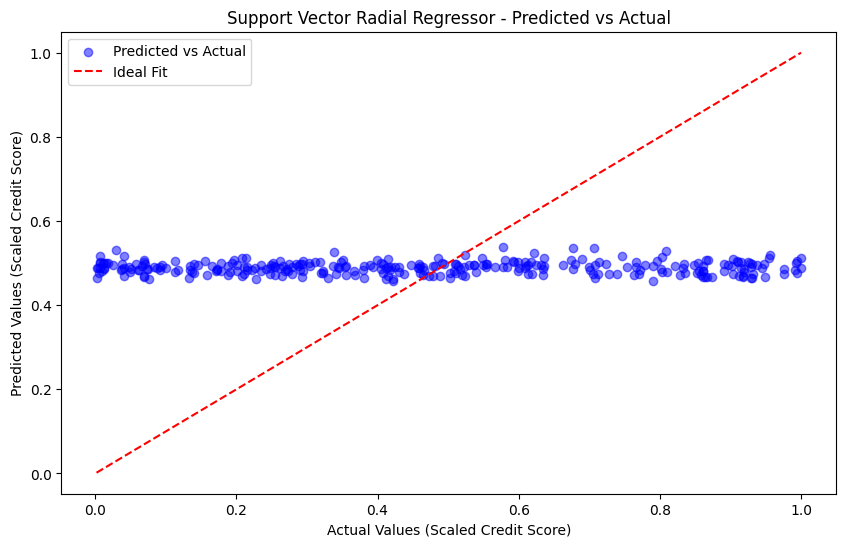

In [21]:
# Plot Regression Line (Actual vs. Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color="blue", alpha=0.5, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Values (Scaled Credit Score)")
plt.ylabel("Predicted Values (Scaled Credit Score)")
plt.title("Support Vector Radial Regressor - Predicted vs Actual")
plt.legend()
plt.show()